# Linear regression

Linear regression은 regression을 위한 linear model이다. 간단한 문제(linearly seperable)에서 regression을 수행하기에 매우 적합하다.

linear regression에는 사용자 지정 파라미터가 없다

In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = datasets.load_diabetes()

**attribute name**

Age, Sex, Body mass index, Average blood pressure, S1, S2, S3, S4, S5, S6(blood serum)

In [3]:
diabetes.data.shape

(442, 10)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=0)

In [5]:
lr = linear_model.LinearRegression()

In [6]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lr.coef_

array([ -52.46990775, -193.51064552,  579.4827762 ,  272.46404234,
       -504.72401371,  241.68441866,  -69.73618783,   86.62018451,
        721.95580222,   26.77887028])

Y(당뇨병의 진행정도)와 X(predictors, attribute)의 상관관계를 나타낸다.

위의 coefficient를 통해 나이, 성별(여성)은 당뇨병의 진행정도와 음의 상관관계를 나타내고, 체질량지수와 평균혈압은 당뇨병 진행정도에 매우 강한 양의 상관관계를 나타냄을 확인할 수 있다.

In [8]:
lr.intercept_

153.71914540545853

In [9]:
Y_pred = lr.predict(X_test)

MSE(Mean Squared Error)를 통해 모델의 적합성을 예측해볼 수 있다.

하지만 data의 scale에 따라 mse의 값이 달라지는 것에 주의해야한다.

또 다른 linear regression 모델 적합도 측정 방법으로는 r^2가 있다.

r^2는 SSE를 SST로 나눈 값이므로 regression 모델의 적합도를 평가하는 지표로 사용하기 더 적절하다.

r^2이 1에 가까울수록 좋은 linear regression 모델이라고 판단할 수 있다.

In [10]:
mean_squared_error(Y_test, Y_pred)

3097.146138387797

In [11]:
r2_score(Y_test,Y_pred)

0.3928939845074759

In [12]:
#training score
print(lr.score(X_train, Y_train))

0.5539411781927147


In [13]:
#test score
print(lr.score(X_test, Y_test))

0.3928939845074759


위의 multiple linear regression 모델은 training score에 비해 test score가 크게 떨어져 overfitting 됐다고 판단할 수 있다.

모델을 단순하하기 위해 coefficient가 가장 높은 'Body max index' attribute만 사용하여 linear regression model을 학습시켜보자.

In [14]:
diabetes_one = diabetes.data[:,np.newaxis,2]
x_train = diabetes_one[:-20]
x_test = diabetes_one[-20:]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:,]

In [15]:
lr2 = linear_model.LinearRegression()

In [16]:
lr2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_pred = lr2.predict(x_test)

모든 attribute를 사용하여 만든 linear regression model보다 mse는 작아지고 r^2값은 커진것을 확인할 수 있다.

In [18]:
mean_squared_error(y_test,y_pred)

2548.0723987259703

In [19]:
r2_score(y_test,y_pred)

0.47257544798227136

In [20]:
lr2.score(x_train,y_train)

0.3351312506867543

In [21]:
lr2.score(x_test,y_test)

0.47257544798227136

당뇨병의 진행정도(Y)와 체질량지수(X)의 관계를 이용하여 linear regression 그래프를 그려보면 아래와 같다.

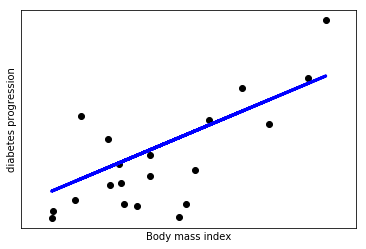

In [22]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Body mass index')
plt.ylabel('diabetes progression')
plt.xticks(())
plt.yticks(())

plt.show()

## Logistic regression

Logistic regression은 이름과는 다르게 주로 classification을 위한 용도로 쓰인다.

Y값은 continous한 값이 아닌 probability 값을 나타낸다.

linearly separable한 데이터에 적용하기 적합하며 매우 빠르고 대체로 좋은 성능을 보인다.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [25]:
cancer = load_breast_cancer()

In [74]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [75]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

In [27]:
lgr = LogisticRegression().fit(X_train, Y_train)

In [28]:
lgr.score(X_train, Y_train)

0.949748743718593

In [29]:
lgr.score(X_test, Y_test)

0.9590643274853801

logistic regression의 hyper-parameter C(inverse of regularization strength)를 최적화해보자

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
list = [0.01,0.1,1,10,100]
cv_error = []

In [32]:
for c in list:
    lgr_cv = LogisticRegression(C=c)
    scores = cross_val_score(lgr_cv, X_train, Y_train, cv=10, scoring='accuracy')
    cv_error.append(1-scores.mean())

In [33]:
c_optimal = list[cv_error.index(min(cv_error))]

In [34]:
c_optimal

100

In [35]:
lgropt = LogisticRegression(C=c_optimal)
lgropt.fit(X_train,Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

최적화한 logistic regression의 training accuracy와 test accuracy를 나타내본다.

두 값 모두 이전의 모델보다 성능이 향상되었음을 확인할 수 있다.

In [36]:
lgropt.score(X_train,Y_train)

0.9597989949748744

In [37]:
lgropt.score(X_test,Y_test)

0.9649122807017544

각 predictor(feature)와 Y(target)과의 상관관계를 확인할 수 있다.

In [38]:
lgropt.coef_

array([[ 3.96881177e+00,  2.06796453e-01, -3.47185016e-01,
        -1.27473195e-03, -3.76321840e-01, -8.42962174e-01,
        -1.34815351e+00, -7.27180692e-01, -5.33647484e-01,
        -6.50015166e-02, -8.11951486e-02,  2.50205463e+00,
        -4.70833203e-01, -1.02386814e-01, -5.11767239e-02,
         8.42076869e-02, -3.86204163e-02, -8.73581216e-02,
        -8.64733243e-02,  2.19793415e-02,  5.16590177e-01,
        -5.24144292e-01,  7.83386051e-02, -3.25567641e-02,
        -7.30481979e-01, -2.33669493e+00, -3.07280628e+00,
        -1.49050523e+00, -1.84270108e+00, -2.86025925e-01]])

In [39]:
lgropt.intercept_

array([0.77109998])

sample마다 malignant, benign일 확률이 각각 몇인지 확인해볼 수 있다

In [66]:
lgropt.predict_proba(X_train)

array([[9.99813082e-01, 1.86917964e-04],
       [2.92084054e-04, 9.99707916e-01],
       [2.66640462e-05, 9.99973336e-01],
       [1.00000000e+00, 2.02921887e-10],
       [9.99996981e-01, 3.01918611e-06],
       [3.87882280e-04, 9.99612118e-01],
       [9.99999974e-01, 2.62405775e-08],
       [9.92432332e-01, 7.56766844e-03],
       [1.32224008e-02, 9.86777599e-01],
       [9.99999227e-01, 7.72548791e-07],
       [1.00000000e+00, 2.08198555e-15],
       [9.84484013e-06, 9.99990155e-01],
       [3.68052472e-05, 9.99963195e-01],
       [6.85455327e-03, 9.93145447e-01],
       [1.58199936e-04, 9.99841800e-01],
       [6.02653719e-04, 9.99397346e-01],
       [8.21168717e-04, 9.99178831e-01],
       [9.99996828e-01, 3.17179094e-06],
       [3.09910112e-03, 9.96900899e-01],
       [7.08237192e-03, 9.92917628e-01],
       [1.40004105e-03, 9.98599959e-01],
       [1.42576006e-03, 9.98574240e-01],
       [9.95604612e-01, 4.39538826e-03],
       [1.00000000e+00, 7.65182654e-32],
       [1.123557